In [2]:
import json
import os
from glob import glob

image_dirs = {
    "TRAIN": "/kaggle/input/ua-detrac-reannotated-classes/UA-DETRAC_UPD_ANN/images/train",
    "VAL": "/kaggle/input/ua-detrac-reannotated-classes/UA-DETRAC_UPD_ANN/images/val",
}
 
label_dirs = {
    "TRAIN": "/kaggle/input/ua-detrac-reannotated-classes/UA-DETRAC_UPD_ANN/labels/train",
    "VAL": "/kaggle/input/ua-detrac-reannotated-classes/UA-DETRAC_UPD_ANN/labels/val",
}

In [5]:
def get_stat(name):
    image_dir = image_dirs[name]
    label_dir = label_dirs[name]
    
    all_images = glob(os.path.join(image_dir, "**", "*.jpg"), recursive=True)
    all_images = set([os.path.basename(img) for img in all_images])

    all_labels = glob(os.path.join(label_dir, "**", "*.txt"), recursive=True)
    all_annotated_images = set([os.path.basename(lbl).replace(".txt", ".jpg") for lbl in all_labels])

    print(f"{name}:")
    print(f"Всего изображений:            {len(all_images)}")
    print(f"Аннотированных изображений:   {len(all_images & all_annotated_images)}")
    print(f"Неаннотированных изображений: {len(all_images - all_annotated_images)}\n")

In [6]:
get_stat("TRAIN")
get_stat("VAL")

TRAIN:
Всего изображений:            83791
Аннотированных изображений:   83756
Неаннотированных изображений: 35

VAL:
Всего изображений:            16015
Аннотированных изображений:   16015
Неаннотированных изображений: 0



In [7]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 15.8 MB/s eta 0:00:00a 0:00:01


In [8]:
import json
import cv2
import matplotlib.pyplot as plt
import random

categories = {
    1: "bicycle",
    2: "motorcycle",
    3: "car",
    4: "transporter (van)",
    5: "bus",
    6: "truck (others)",
    7: "trailer - no instance of it in the dataset",
    8: "unknown",
    9: "mask",
}


# **Чекпоинт 3.  Бейзлайн.** # 


In [10]:
!git clone https://github.com/ultralytics/yolov5
!pip install -U -r yolov5/requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
  Using cached psutil-6.1.0-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (22 kB)
Using cached psutil-6.1.0-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (287 kB)
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.8
    Uninstalling psutil-5.9.8:
      Successfully uninstalled psutil-5.9.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 2024.66.154055 requires jupyterlab~=3.6.0, but you have jupyterlab 4.3.1 which is incompatible.
distributed 2024.9.0 requires dask==2024.9.0, but you have dask 2024.11.2 which is incompatible.
jupyterlab 4.3.1 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
ju

In [11]:
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 72.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.10.1 requires cubinlinker, which is not installed.
cudf 24.10.1 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.10.1 requires libcudf==24.10.*, which is not installed.
cudf 24.10.1 requires ptxcompiler, which is not installed.
cuml 24.10.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 24.10.0 requires cuvs==24.10.*, which is not installed.
cuml 24.10.0 requires nvidia-cublas, which is not installed.
cuml 24.10.0 requires nvidia-cufft, which is not installed.
cuml 24.10.0 requires nvidia-curand, which is not installed.
cuml 24.10.0 requires nvid

[([0.150521, 0.106481, 0.0427083, 0.0574074], 'car'), ([0.502083, 0.130556, 0.0520833, 0.0722222], 'transporter (van)'), ([0.304688, 0.0833333, 0.034375, 0.037037], 'car'), ([0.0161458, 0.323148, 0.0302083, 0.109259], 'car'), ([0.717187, 0.325926, 0.119792, 0.111111], 'car'), ([0.0880208, 0.0731481, 0.176042, 0.0388889], 'mask'), ([0.131771, 0.162037, 0.046875, 0.0574074], 'car'), ([0.356771, 0.107407, 0.0510417, 0.0592593], 'car'), ([0.828125, 0.887037, 0.25, 0.22963], 'car'), ([0.676042, 0.17037, 0.0770833, 0.0666667], 'car'), ([0.302604, 0.037963, 0.021875, 0.0277778], 'car'), ([0.0713542, 0.20463, 0.0510417, 0.0722222], 'car'), ([0.578125, 0.212963, 0.0791667, 0.0851852], 'car'), ([0.0151042, 0.108333, 0.028125, 0.0425926], 'car'), ([0.365625, 0.062963, 0.04375, 0.0481481], 'transporter (van)'), ([0.282813, 0.0472222, 0.0260417, 0.0388889], 'transporter (van)'), ([0.208333, 0.281481, 0.0708333, 0.122222], 'car'), ([0.140104, 0.0277778, 0.280208, 0.0555556], 'mask'), ([0.307292, 0.1

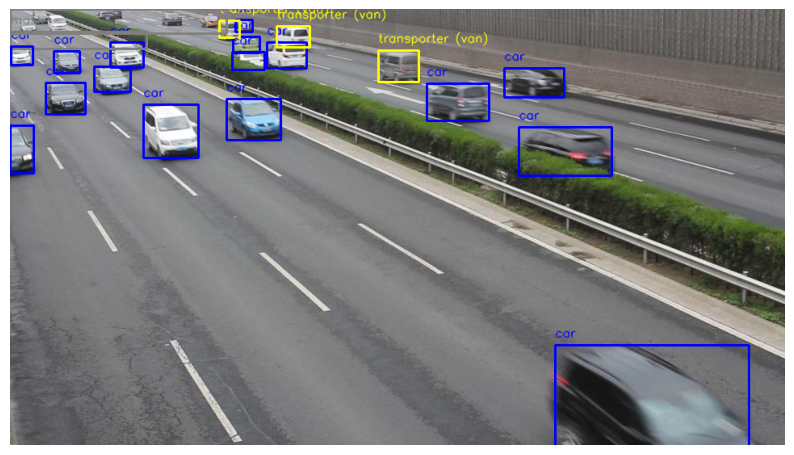

In [12]:
category_colors = {
    "bicycle": (255, 0, 0),
    "motorcycle": (0, 255, 0),
    "car": (0, 0, 255), 
    "transporter (van)": (255, 255, 0),
    "bus": (0, 255, 255),
    "truck (others)": (255, 0, 255),
    "trailer - no instance of it in the dataset": (128, 128, 128),
    "unknown": (128, 0, 128),
    "mask": (128, 128, 128),
}


def load_annotations(label_file):
    annotations = []
    with open(label_file, "r") as f:
        for line in f:
            parts = line.strip().split()
            class_id = int(parts[0])
            bbox = list(map(float, parts[1:]))  
            class_name = list(category_colors.keys())[class_id]
            annotations.append((bbox, class_name))
    return annotations
    

def plot_bounding_boxes(image_path, annotations):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    

    height, width, _ = image.shape
    
    for bbox, class_name in annotations:
        x_center, y_center, box_width, box_height = bbox
        x_min = int((x_center - box_width / 2) * width)
        y_min = int((y_center - box_height / 2) * height)
        x_max = int((x_center + box_width / 2) * width)
        y_max = int((y_center + box_height / 2) * height)

        color = category_colors.get(class_name, (255, 255, 255))

        thickness = 2
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)

        label = f"{class_name}"
        cv2.putText(
            image, label, (int(x_min), int(y_min) - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1, cv2.LINE_AA
        )

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

image_name = os.listdir(image_dirs["TRAIN"])[250]
image_path = os.path.join(image_dirs["TRAIN"], image_name)

label_name = image_name.replace(".jpg", ".txt")
label_path = os.path.join(label_dirs["TRAIN"], label_name)

annotations = load_annotations(label_path)
print(annotations)
plot_bounding_boxes(image_path, annotations)

In [13]:
import shutil

train_images_dir = image_dirs["TRAIN"]
train_labels_dir = label_dirs["TRAIN"]
subset_images_dir = "/kaggle/working/dataset_subset/images/train"
subset_labels_dir = "/kaggle/working/dataset_subset/labels/train"

os.makedirs(subset_images_dir, exist_ok=True)
os.makedirs(subset_labels_dir, exist_ok=True)

image_files = sorted(os.listdir(train_images_dir))

subset_size = int(len(image_files) * 0.1)
subset_files = image_files[:subset_size]

for file in subset_files:
    src_image_path = os.path.join(train_images_dir, file)
    dst_image_path = os.path.join(subset_images_dir, file)
    shutil.copyfile(src_image_path, dst_image_path)
    
    label_file = file.replace(".jpg", ".txt")
    src_label_path = os.path.join(train_labels_dir, label_file)
    dst_label_path = os.path.join(subset_labels_dir, label_file)
    
    if os.path.exists(src_label_path):
        shutil.copyfile(src_label_path, dst_label_path)

print("Количество изображений в подвыборке:", len(os.listdir(subset_images_dir)))
print("Количество аннотаций в подвыборке:", len(os.listdir(subset_labels_dir)))


Количество изображений в подвыборке: 8379
Количество аннотаций в подвыборке: 8379


***Нужно создать ямлик с описанием классов и путей для обучяения модельки***

In [14]:
dataset_yaml = """
train: /kaggle/working/dataset_subset/images/train
val: /kaggle/input/ua-detrac-reannotated-classes/UA-DETRAC_UPD_ANN/images/val

nc: 9
names:
  0: bicycle
  1: motorcycle
  2: car
  3: transporter (van)
  4: bus
  5: truck (others)
  6: trailer - no instance of it in the dataset
  7: unknown
  8: mask
"""

with open("dataset.yaml", "w") as f:
    f.write(dataset_yaml)

In [15]:
from IPython.display import Javascript

def notify(title, message):
    script = f"""
    if (!("Notification" in window)) {{
        alert("Браузер не поддерживает уведомления.");
    }} else if (Notification.permission === "granted") {{
        new Notification("{title}", {{
            body: "{message}",
        }});
    }} else if (Notification.permission !== "denied") {{
        Notification.requestPermission().then(permission => {{
            if (permission === "granted") {{
                new Notification("{title}", {{
                    body: "{message}",
                }});
            }}
        }});
    }}
    """
    display(Javascript(script))

# notify("Kaggle Notification", "Обучение завершено!")

In [18]:
!pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 473.1 kB/s eta 0:00:000:01m0:02m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 52.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1
    Uninstalling torch-2.5.1:
      Successfully uninstalled torch-2.5.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1
    Uninstalling torchvision-0.20.1:
      Successfully uninstalled torchvision-0.20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-lightning 2.4.0 requires torch>=2.1.0, but you have torch 1.12.1+cu113 which is incompatible.
stable-baselines3 2.1.0 requires torch>=1.13, but you have torch 1.12.1+cu113 which is incompatible.
torchmetrics 1.6.0 requires torch>=2.0.0, but you

In [19]:
!python yolov5/train.py \
    --data dataset.yaml \
    --weights yolov5n.pt \
    --save-period 5 \
    --epochs 50 \
    --batch-size 32 \
    --img-size 416

notify("Kaggle Notification", "Обучение yolov5 завершено!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5n.pt, cfg=, data=dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False,

<IPython.core.display.Javascript object>

In [14]:

!zip -r yolov5_runs.zip /kaggle/working/yolov5/runs/train/

  adding: kaggle/working/yolov5/runs/train/ (stored 0%)
  adding: kaggle/working/yolov5/runs/train/exp/ (stored 0%)
  adding: kaggle/working/yolov5/runs/train/exp/val_batch2_labels.jpg (deflated 12%)
  adding: kaggle/working/yolov5/runs/train/exp/opt.yaml (deflated 50%)
  adding: kaggle/working/yolov5/runs/train/exp/results.png (deflated 7%)
  adding: kaggle/working/yolov5/runs/train/exp/confusion_matrix.png (deflated 20%)
  adding: kaggle/working/yolov5/runs/train/exp/results.csv (deflated 83%)
  adding: kaggle/working/yolov5/runs/train/exp/train_batch2.jpg (deflated 4%)
  adding: kaggle/working/yolov5/runs/train/exp/events.out.tfevents.1733911417.04dbcb1c085b.121.0 (deflated 91%)
  adding: kaggle/working/yolov5/runs/train/exp/val_batch1_labels.jpg (deflated 9%)
  adding: kaggle/working/yolov5/runs/train/exp/val_batch2_pred.jpg (deflated 9%)
  adding: kaggle/working/yolov5/runs/train/exp/val_batch0_labels.jpg (deflated 9%)
  adding: kaggle/working/yolov5/runs/train/exp/labels.jpg (def

**Обучение YOLOv8 с аналогичными параметрами**

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="dataset.yaml", 
    epochs=50,         
    batch=32,          
    imgsz=416,         
    save_period=5,     
    device=0  # Используем GPU (если доступен)
)

notify("Kaggle Notification", "Обучение yolov8 завершено!")

  0%|          | 0.00/6.25M [00:00<?, ?B/s]

Ultralytics 8.3.49 🚀 Python-3.10.14 torch-1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=5, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

  0%|          | 0.00/5.35M [00:00<?, ?B/s]

AMP: checks passed ✅


train: Scanning /kaggle/working/dataset_subset/labels/train... 8379 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8379/8379 [00:07<00:00, 1138.61it/s]


train: New cache created: /kaggle/working/dataset_subset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/ua-detrac-reannotated-classes/UA-DETRAC_UPD_ANN/labels/val... 16015 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16015/16015 [00:22<00:00, 719.94it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/ua-detrac-reannotated-classes/UA-DETRAC_UPD_ANN/labels is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.56G      1.467      1.923      1.154        784        416: 100%|██████████| 262/262 [00:51<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:57<00:00,  4.38it/s]


                   all      16015     254230      0.641     0.0905     0.0787     0.0529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.56G      1.032     0.7656     0.9664        747        416: 100%|██████████| 262/262 [00:48<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:57<00:00,  4.39it/s]


                   all      16015     254230      0.401      0.126     0.0984     0.0609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.76G      0.922     0.6411      0.921        684        416: 100%|██████████| 262/262 [00:46<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:57<00:00,  4.38it/s]


                   all      16015     254230      0.297      0.114     0.0967     0.0576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.7G     0.8588     0.5797     0.9036        766        416: 100%|██████████| 262/262 [00:45<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:57<00:00,  4.36it/s]


                   all      16015     254230       0.14      0.128     0.0924     0.0577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.97G     0.8117     0.5359     0.8897        867        416: 100%|██████████| 262/262 [00:46<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:57<00:00,  4.37it/s]


                   all      16015     254230      0.156      0.122      0.105     0.0645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.15G     0.7775     0.5047     0.8809        961        416: 100%|██████████| 262/262 [00:46<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:58<00:00,  4.31it/s]


                   all      16015     254230      0.168      0.115        0.1     0.0612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.57G     0.7463      0.481     0.8718        899        416: 100%|██████████| 262/262 [00:46<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:57<00:00,  4.36it/s]


                   all      16015     254230      0.276      0.125      0.103     0.0612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.88G     0.7274     0.4619     0.8678        871        416: 100%|██████████| 262/262 [00:46<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:57<00:00,  4.33it/s]


                   all      16015     254230      0.272      0.141      0.097      0.059

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.98G     0.7051     0.4476     0.8625        929        416: 100%|██████████| 262/262 [00:46<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:57<00:00,  4.36it/s]


                   all      16015     254230      0.152      0.115      0.102     0.0614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.16G     0.6907      0.435     0.8602        803        416: 100%|██████████| 262/262 [00:46<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:57<00:00,  4.36it/s]


                   all      16015     254230      0.158      0.102     0.0947     0.0594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.67G     0.6741     0.4202     0.8541        945        416: 100%|██████████| 262/262 [00:46<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:55<00:00,  4.52it/s]


                   all      16015     254230      0.153      0.114      0.106      0.064

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.71G     0.6652     0.4134     0.8526        639        416: 100%|██████████| 262/262 [00:45<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:55<00:00,  4.53it/s]


                   all      16015     254230      0.136      0.112     0.0839     0.0515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.42G      0.657     0.4094     0.8515        859        416: 100%|██████████| 262/262 [00:45<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:55<00:00,  4.49it/s]


                   all      16015     254230      0.266       0.11     0.0858     0.0539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.52G     0.6436     0.3997     0.8485        808        416: 100%|██████████| 262/262 [00:46<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:56<00:00,  4.47it/s]


                   all      16015     254230      0.145      0.121     0.0923     0.0574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.53G     0.6393     0.3946     0.8475        838        416: 100%|██████████| 262/262 [00:46<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:56<00:00,  4.46it/s]


                   all      16015     254230       0.18      0.111     0.0962     0.0584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.65G     0.6267     0.3882     0.8453        946        416: 100%|██████████| 262/262 [00:45<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:55<00:00,  4.56it/s]


                   all      16015     254230      0.213     0.0924     0.0843     0.0497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.47G     0.6225     0.3839     0.8441        604        416: 100%|██████████| 262/262 [00:46<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|█▉        | 49/251 [00:11<00:43,  4.63it/s]

In [17]:
!zip -r yolov8_runs.zip /kaggle/working/runs/

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/train/ (stored 0%)
  adding: kaggle/working/runs/detect/train/val_batch2_labels.jpg (deflated 8%)
  adding: kaggle/working/runs/detect/train/results.png (deflated 7%)
  adding: kaggle/working/runs/detect/train/confusion_matrix_normalized.png (deflated 20%)
  adding: kaggle/working/runs/detect/train/confusion_matrix.png (deflated 19%)
  adding: kaggle/working/runs/detect/train/results.csv (deflated 61%)
  adding: kaggle/working/runs/detect/train/train_batch10482.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/train/train_batch2.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/train/val_batch1_labels.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/train/val_batch2_pred.jpg (deflated 7%)
  adding: kaggle/working/runs/detect/train/val_batch0_labels.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/train/labels.jpg (deflated 33%)
  adding

**Обучение YOLOv11 с аналогичными параметрами**

In [19]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

model.train(
    data="dataset.yaml", 
    epochs=50,         
    batch=32,          
    imgsz=416,         
    save_period=5,     
    device=0
)

notify("Kaggle Notification", "Обучение yolov11 завершено!")

Ultralytics 8.3.49 🚀 Python-3.10.14 torch-1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=dataset.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=5, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

train: Scanning /kaggle/working/dataset_subset/labels/train.cache... 8379 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8379/8379 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/ua-detrac-reannotated-classes/UA-DETRAC_UPD_ANN/labels/val... 16015 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16015/16015 [00:23<00:00, 678.41it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/ua-detrac-reannotated-classes/UA-DETRAC_UPD_ANN/labels is not writeable, cache not saved.
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.89G      1.476      2.197      1.144        784        416: 100%|██████████| 262/262 [00:57<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:58<00:00,  4.28it/s]


                   all      16015     254230       0.67     0.0901     0.0939     0.0586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.68G      1.043     0.7881       0.96        747        416: 100%|██████████| 262/262 [00:54<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:59<00:00,  4.21it/s]


                   all      16015     254230      0.537      0.113      0.103     0.0661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.13G     0.9275     0.6566     0.9185        684        416: 100%|██████████| 262/262 [00:52<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:57<00:00,  4.38it/s]


                   all      16015     254230      0.431     0.0812      0.062      0.038

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.8G      0.871      0.594     0.9047        766        416: 100%|██████████| 262/262 [00:52<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:57<00:00,  4.40it/s]


                   all      16015     254230      0.492      0.106     0.0787     0.0449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.93G     0.8181     0.5421     0.8897        867        416: 100%|██████████| 262/262 [00:52<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:57<00:00,  4.40it/s]


                   all      16015     254230      0.386      0.114     0.0931     0.0542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.08G     0.7846     0.5119     0.8818        961        416: 100%|██████████| 262/262 [00:52<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:56<00:00,  4.46it/s]


                   all      16015     254230      0.183        0.1     0.0922     0.0556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.85G     0.7564     0.4861     0.8738        899        416: 100%|██████████| 262/262 [00:52<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:55<00:00,  4.49it/s]


                   all      16015     254230      0.259     0.0748     0.0875     0.0545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.94G     0.7349     0.4672     0.8688        871        416: 100%|██████████| 262/262 [00:53<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:56<00:00,  4.43it/s]


                   all      16015     254230      0.228      0.104     0.0868     0.0532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.01G     0.7143     0.4534     0.8638        929        416: 100%|██████████| 262/262 [00:52<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:55<00:00,  4.50it/s]


                   all      16015     254230      0.217      0.118     0.0961     0.0579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         3G     0.7005      0.441     0.8623        803        416: 100%|██████████| 262/262 [00:51<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.57it/s]


                   all      16015     254230      0.244     0.0919     0.0863     0.0541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.68G     0.6806     0.4269     0.8554        945        416: 100%|██████████| 262/262 [00:52<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.58it/s]


                   all      16015     254230       0.21     0.0784     0.0797     0.0506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.05G     0.6775     0.4215     0.8542        639        416: 100%|██████████| 262/262 [00:52<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.57it/s]


                   all      16015     254230      0.349     0.0998     0.0898     0.0546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.73G     0.6634     0.4137     0.8521        859        416: 100%|██████████| 262/262 [00:51<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.57it/s]


                   all      16015     254230      0.215        0.1     0.0763     0.0464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.85G     0.6479     0.4043     0.8497        808        416: 100%|██████████| 262/262 [00:52<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:56<00:00,  4.44it/s]


                   all      16015     254230      0.236      0.113       0.11     0.0646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.79G     0.6465     0.4025     0.8494        838        416: 100%|██████████| 262/262 [00:51<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.58it/s]


                   all      16015     254230      0.208      0.108      0.112     0.0671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.72G     0.6338     0.3946     0.8462        946        416: 100%|██████████| 262/262 [00:52<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.58it/s]


                   all      16015     254230      0.223     0.0941     0.0804     0.0485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.56G      0.626     0.3876     0.8437        604        416: 100%|██████████| 262/262 [00:51<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.60it/s]


                   all      16015     254230      0.191     0.0821      0.073     0.0455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.82G     0.6173     0.3831     0.8413        803        416: 100%|██████████| 262/262 [00:52<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.59it/s]


                   all      16015     254230      0.224      0.097      0.097     0.0615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.93G     0.6093     0.3775     0.8403        912        416: 100%|██████████| 262/262 [00:52<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:55<00:00,  4.56it/s]


                   all      16015     254230      0.261     0.0931     0.0877     0.0511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.71G      0.606     0.3744     0.8395        786        416: 100%|██████████| 262/262 [00:51<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.60it/s]


                   all      16015     254230      0.227     0.0846     0.0833     0.0526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.84G     0.5985     0.3709      0.838        744        416: 100%|██████████| 262/262 [00:52<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.64it/s]


                   all      16015     254230       0.27      0.102      0.106     0.0658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.81G     0.5903     0.3645      0.838        875        416: 100%|██████████| 262/262 [00:52<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.59it/s]


                   all      16015     254230      0.242     0.0981     0.0941     0.0574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         3G     0.5832     0.3597     0.8355        756        416: 100%|██████████| 262/262 [00:51<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.61it/s]


                   all      16015     254230      0.185      0.114     0.0894     0.0535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.7G     0.5783      0.358     0.8344        722        416: 100%|██████████| 262/262 [00:52<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.62it/s]


                   all      16015     254230      0.235      0.104     0.0943     0.0576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.83G     0.5745     0.3552     0.8337        893        416: 100%|██████████| 262/262 [00:51<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:55<00:00,  4.55it/s]


                   all      16015     254230      0.251      0.114      0.102      0.061

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.91G     0.5704     0.3533      0.834        848        416: 100%|██████████| 262/262 [00:52<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:53<00:00,  4.73it/s]


                   all      16015     254230      0.222     0.0762     0.0705     0.0439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.95G     0.5649     0.3499     0.8323        816        416: 100%|██████████| 262/262 [00:52<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.64it/s]


                   all      16015     254230      0.179     0.0858     0.0878     0.0564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.8G     0.5575     0.3454     0.8312        781        416: 100%|██████████| 262/262 [00:51<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:53<00:00,  4.68it/s]


                   all      16015     254230      0.198     0.0951     0.0927     0.0594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.78G     0.5539     0.3433     0.8294        788        416: 100%|██████████| 262/262 [00:51<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.64it/s]


                   all      16015     254230      0.214     0.0909     0.0831     0.0504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.68G     0.5482     0.3403     0.8294        886        416: 100%|██████████| 262/262 [00:51<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:53<00:00,  4.65it/s]


                   all      16015     254230       0.18     0.0915     0.0749     0.0453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.01G     0.5453     0.3374     0.8279        808        416: 100%|██████████| 262/262 [00:51<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.63it/s]


                   all      16015     254230      0.235      0.092     0.0848     0.0522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.7G      0.538     0.3336     0.8272        740        416: 100%|██████████| 262/262 [00:53<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.62it/s]


                   all      16015     254230      0.238      0.104     0.0838     0.0516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.82G     0.5358      0.333     0.8271        763        416: 100%|██████████| 262/262 [00:52<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.64it/s]


                   all      16015     254230      0.231     0.0841     0.0838     0.0534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.94G     0.5294     0.3297     0.8256        849        416: 100%|██████████| 262/262 [00:51<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:53<00:00,  4.68it/s]


                   all      16015     254230      0.243     0.0845     0.0916     0.0589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.75G     0.5235     0.3263     0.8252        666        416: 100%|██████████| 262/262 [00:52<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:53<00:00,  4.65it/s]


                   all      16015     254230      0.211     0.0945     0.0811     0.0501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.51G     0.5207     0.3242     0.8242        830        416: 100%|██████████| 262/262 [00:52<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:53<00:00,  4.66it/s]


                   all      16015     254230      0.225     0.0853     0.0869     0.0543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.91G     0.5174     0.3223     0.8233        856        416: 100%|██████████| 262/262 [00:52<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.59it/s]


                   all      16015     254230      0.241     0.0981     0.0946     0.0589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.07G     0.5126     0.3202     0.8229        856        416: 100%|██████████| 262/262 [00:52<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.64it/s]


                   all      16015     254230      0.218     0.0933     0.0919     0.0575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.71G     0.5088     0.3177     0.8219        845        416: 100%|██████████| 262/262 [00:52<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.65it/s]


                   all      16015     254230      0.249        0.1      0.108     0.0674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.85G     0.5033     0.3144     0.8212        779        416: 100%|██████████| 262/262 [00:51<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.58it/s]


                   all      16015     254230      0.245     0.0905     0.0914     0.0569
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.31G     0.4912     0.2948     0.8081        376        416: 100%|██████████| 262/262 [00:53<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:55<00:00,  4.55it/s]


                   all      16015     254230      0.232      0.087     0.0863     0.0538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.32G     0.4739      0.285     0.8054        427        416: 100%|██████████| 262/262 [00:51<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:55<00:00,  4.55it/s]


                   all      16015     254230      0.213     0.0865     0.0872     0.0552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       2.3G     0.4619     0.2793     0.8036        452        416: 100%|██████████| 262/262 [00:51<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.60it/s]


                   all      16015     254230      0.236      0.089      0.095     0.0601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       2.3G     0.4573     0.2766     0.8028        402        416: 100%|██████████| 262/262 [00:51<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:55<00:00,  4.55it/s]


                   all      16015     254230      0.241     0.0828     0.0956     0.0611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.31G     0.4484     0.2724      0.802        436        416: 100%|██████████| 262/262 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.57it/s]


                   all      16015     254230      0.237     0.0869     0.0979     0.0625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       2.3G     0.4412     0.2689     0.8014        399        416: 100%|██████████| 262/262 [00:51<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.61it/s]


                   all      16015     254230      0.228      0.084     0.0937     0.0593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.31G     0.4361     0.2662     0.8003        414        416: 100%|██████████| 262/262 [00:50<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.61it/s]


                   all      16015     254230      0.227      0.082     0.0945     0.0596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.27G     0.4293     0.2631     0.7993        411        416: 100%|██████████| 262/262 [00:50<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.58it/s]


                   all      16015     254230      0.253     0.0805     0.0992     0.0622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.31G     0.4257     0.2611     0.7992        434        416: 100%|██████████| 262/262 [00:50<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:54<00:00,  4.63it/s]


                   all      16015     254230      0.245     0.0799      0.101     0.0627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.31G     0.4215     0.2586     0.7988        441        416: 100%|██████████| 262/262 [00:51<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:53<00:00,  4.65it/s]


                   all      16015     254230       0.25      0.081      0.102     0.0638

50 epochs completed in 1.525 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.4MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.14 torch-1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [01:12<00:00,  3.49it/s]


                   all      16015     254230      0.209      0.108      0.112     0.0671
               bicycle       1102       1111          0          0          0          0
            motorcycle       2142       2864      0.444    0.00837     0.0705     0.0286
                   car      15522     115803      0.494      0.223      0.291      0.176
     transporter (van)       5338       7983        0.4      0.206      0.194      0.128
                   bus       8275      12540      0.304      0.417      0.333      0.201
        truck (others)        939       1035          0          0    0.00082   0.000227
               unknown        902        902          0          0          0          0
                  mask      16015     111992     0.0302     0.0107    0.00906    0.00266
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train2


<IPython.core.display.Javascript object>

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [21]:
!zip -r yolov11_runs.zip /kaggle/working/runs/detect/train2

  adding: kaggle/working/runs/detect/train2/ (stored 0%)
  adding: kaggle/working/runs/detect/train2/val_batch2_labels.jpg (deflated 8%)
  adding: kaggle/working/runs/detect/train2/results.png (deflated 6%)
  adding: kaggle/working/runs/detect/train2/confusion_matrix_normalized.png (deflated 20%)
  adding: kaggle/working/runs/detect/train2/confusion_matrix.png (deflated 20%)
  adding: kaggle/working/runs/detect/train2/results.csv (deflated 61%)
  adding: kaggle/working/runs/detect/train2/train_batch10482.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/train2/train_batch2.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/train2/val_batch1_labels.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/train2/val_batch2_pred.jpg (deflated 7%)
  adding: kaggle/working/runs/detect/train2/val_batch0_labels.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/train2/labels.jpg (deflated 33%)
  adding: kaggle/working/runs/detect/train2/val_batch0_pred.jpg (deflated 8%)
  adding: k

In [ ]:
# from tensorboard import notebook
# notebook.start("--logdir=runs/train --host=0.0.0.0")
!kill 580